In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 

importing data

In [3]:
data=pd.read_csv('Social_Network_Ads.csv')
print(data.head())

Age  EstimatedSalary  Purchased
0   19            19000          0
1   35            20000          0
2   26            43000          0
3   27            57000          0
4   19            76000          0


In [4]:
data.describe()

,Age,EstimatedSalary,Purchased
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


Checking for null values

In [5]:
data.isnull().sum()

Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

Data Splitting

In [6]:
from sklearn.model_selection import train_test_split
x=data.iloc[:,:-1].values
y=data.iloc[:,-1].values.reshape(-1,1)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=0)

Feature Scaling

In [7]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)


Model training

In [8]:
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()
nb.fit(x_train,y_train)

GaussianNB()

In [9]:
nb.score(x_train,y_train)

0.8833333333333333

Predicting on test data

In [10]:
y_pred=nb.predict(x_test)

In [11]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
accuracy_score(y_test,y_pred)

0.9

In [12]:
confusion_matrix(y_test,y_pred)

array([[65,  3],
       [ 7, 25]])

In [13]:
print(classification_report(y_test,y_pred))

precision    recall  f1-score   support

           0       0.90      0.96      0.93        68
           1       0.89      0.78      0.83        32

    accuracy                           0.90       100
   macro avg       0.90      0.87      0.88       100
weighted avg       0.90      0.90      0.90       100



Cumulative Accuracy Profile

In [14]:
max_ones=y_test.sum()
probabilities=nb.predict_proba(x_test)
probabilities=probabilities[:,1]
l=[y for _,y in sorted(zip(probabilities,y_test),reverse=True)]

y_scale=np.append([0],np.cumsum(l))
x_scale=np.arange(0,len(x_test)+1)

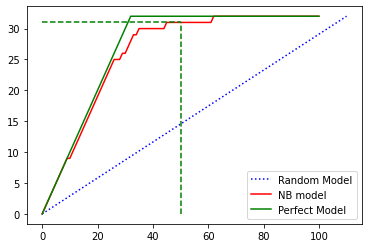

In [17]:
plt.plot([0,len(x_test)+10],[0,max_ones],color='blue',linestyle='dotted',label='Random Model')
plt.plot(x_scale,y_scale,color='red',linestyle='solid',label='NB model')
plt.plot([0,max_ones,len(x_test)],[0,max_ones,max_ones],color='green',label='Perfect Model')

index = int((50*len(x_test) / 100))

## 50% Verticcal line from x-axis
plt.plot([index, index], [0, y_scale[index]], c ='g', linestyle = '--')

## Horizontal line to y-axis from prediction model
plt.plot([0, index], [y_scale[index], y_scale[index]], c = 'g', linestyle = '--')
plt.legend()


In [16]:
print('percentage of class 1=',y_scale[index]*100/max_ones)

percentage of class 1= 96.875
